In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('Cars Datasets 2025.csv', encoding='ISO-8859-1') 
df.head(20)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
5,BMW,Mclaren 720s,V8,"3,994 cc",710 hp,341 km/h,2.9 sec,"$499,000",Petrol,2,770 Nm
6,ASTON MARTIN,VANTAGE F1,V8,"3,982 cc",656 hp,314 km/h,3.6 sec,"$193,440",Petrol,2,685 Nm
7,BENTLEY,Continental GT Azure,V8,"3,996 cc",550 hp,318 km/h,4.0 sec,"$311,000",Petrol,4,900 Nm
8,LAMBORGHINI,VENENO ROADSTER,V12,"6,498 cc",750 hp,356 km/h,2.9 sec,"$4,500,000",Petrol,2,690 Nm
9,FERRARI,F8 TRIBUTO,V8,"3,900 cc",710 hp,340 km/h,2.9 sec,"$280,000",Petrol,2,770 Nm


## Data Cleaning

In [93]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [94]:
df.duplicated().sum()

4

In [95]:
df = df.drop_duplicates()
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm


In [96]:
df['Company Names'] = df['Company Names'].str.title()
df['Company Names']

0           Ferrari
1       Rolls Royce
2              Ford
3          Mercedes
4              Audi
           ...     
1213         Toyota
1214         Toyota
1215         Toyota
1216         Toyota
1217         Toyota
Name: Company Names, Length: 1214, dtype: object

In [97]:
df.head(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,Ferrari,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,Rolls Royce,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,Mercedes,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,Audi,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
5,Bmw,Mclaren 720s,V8,"3,994 cc",710 hp,341 km/h,2.9 sec,"$499,000",Petrol,2,770 Nm
6,Aston Martin,VANTAGE F1,V8,"3,982 cc",656 hp,314 km/h,3.6 sec,"$193,440",Petrol,2,685 Nm
7,Bentley,Continental GT Azure,V8,"3,996 cc",550 hp,318 km/h,4.0 sec,"$311,000",Petrol,4,900 Nm
8,Lamborghini,VENENO ROADSTER,V12,"6,498 cc",750 hp,356 km/h,2.9 sec,"$4,500,000",Petrol,2,690 Nm
9,Ferrari,F8 TRIBUTO,V8,"3,900 cc",710 hp,340 km/h,2.9 sec,"$280,000",Petrol,2,770 Nm


In [98]:
df_encoded = pd.get_dummies(df, columns=['Engines', 'Total Speed'])

print(df_encoded)

     Company Names         Cars Names    CC/Battery Capacity    HorsePower  \
0          Ferrari      SF90 STRADALE                3990 cc        963 hp   
1      Rolls Royce            PHANTOM                6749 cc        563 hp   
2             Ford                KA+               1,200 cc      70-85 hp   
3         Mercedes            GT 63 S               3,982 cc        630 hp   
4             Audi         AUDI R8 Gt               5,204 cc        602 hp   
...            ...                ...                    ...           ...   
1213        Toyota       Crown Signia                2487 cc        240 hp   
1214        Toyota  4Runner (6th Gen)      2393 cc + Battery        326 hp   
1215        Toyota      Corolla Cross  1987 cc / Hybrid batt  169  196 hp   
1216        Toyota             C-HR+   1798 / 1987 cc + batt  140  198 hp   
1217        Toyota     RAV4 (6th Gen)         2487 cc + batt  219  302 hp   

     Performance(0 - 100 )KM/H        Cars Prices              

## EDA and Visualizations

<Axes: ylabel='Frequency'>

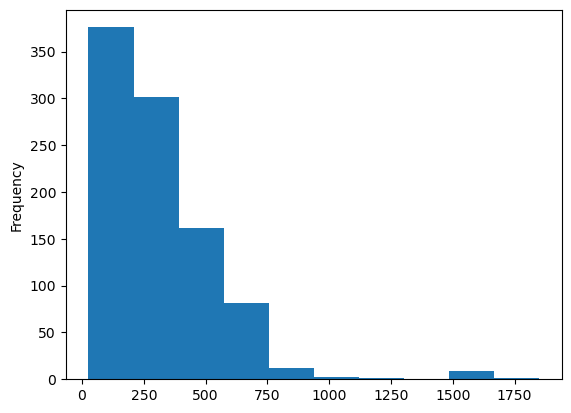

In [100]:
# Replace ' hp' and ' bhp' with an empty string, then convert the column to numeric.
df['HorsePower'] = df['HorsePower'].str.replace(' hp', '', regex=False)
df['HorsePower'] = pd.to_numeric(df['HorsePower'], errors='coerce')

# Drop any rows where horsepower could not be converted to a number
df.dropna(subset=['HorsePower'], inplace=True)

# Now, the histogram will work
df['HorsePower'].plot.hist()

<Axes: ylabel='Frequency'>

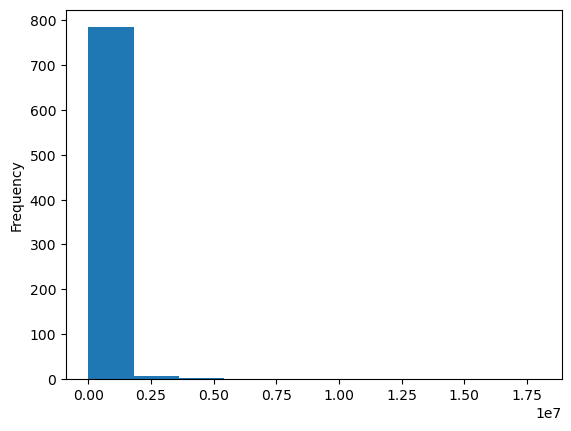

In [101]:
# Remove the dollar sign and commas from the 'Price' column
df['Cars Prices'] = df['Cars Prices'].str.replace('$', '').str.replace(',', '')

# Convert the column to a numeric data type
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'], errors='coerce')

df['Cars Prices'].plot.hist()

Text(0, 0.5, 'Company Names')

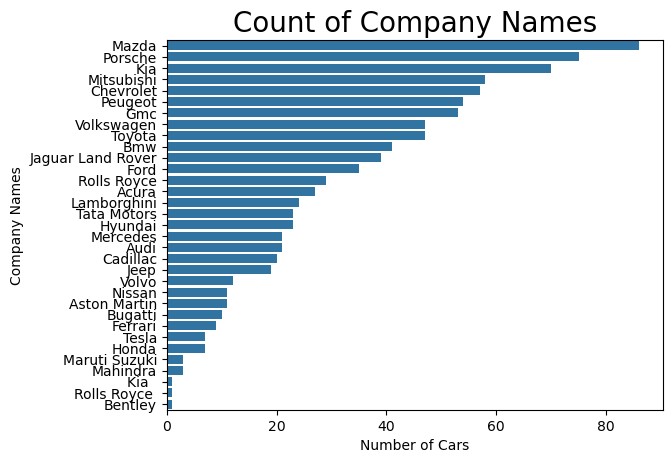

In [102]:
# The correct way to plot a count of car company names
sns.countplot(y='Company Names', data=df, order = df['Company Names'].value_counts().index)


# Set the title of the plot
plt.title('Count of Company Names', fontsize=20)
plt.xlabel('Number of Cars')
plt.ylabel('Company Names')

<Axes: xlabel='HorsePower', ylabel='Cars Prices'>

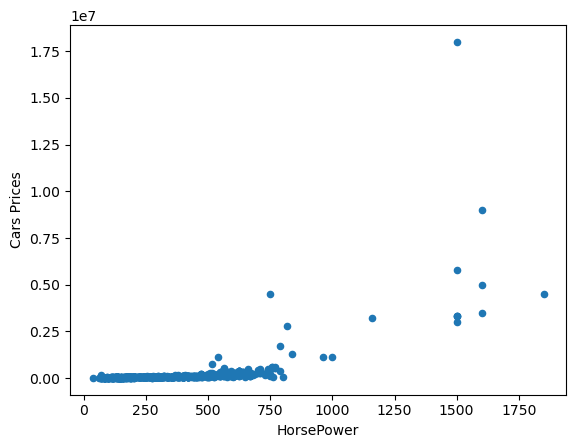

In [103]:
df.plot.scatter(x='HorsePower', y='Cars Prices')

In [105]:
hp_threshold = 250

df['High-Performance'] = np.where(df['HorsePower'] > hp_threshold, 1, 0)

(df[['HorsePower', 'High-Performance']].head())

print(df['High-Performance'].value_counts())


High-Performance
1    498
0    447
Name: count, dtype: int64


## Defining Thresholds for classifications

In [107]:
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')

Cars_Prices_threshold_luxury = 100000
Cars_Prices_threshold_sports = 50000
hp_threshold_sports = 250
seating_threshold_family = 4

In [108]:
conditions = [
    (df['Cars Prices'] > Cars_Prices_threshold_luxury),  # Condition for Luxury cars
    (df['HorsePower'] > hp_threshold_sports) & (df['Seats'] <= seating_threshold_family), # Condition for Sports cars
    (df['Cars Prices'] < Cars_Prices_threshold_sports) & (df['Seats'] >= seating_threshold_family) # Condition for Economy cars
]
choices = ['Luxury', 'Sports', 'Economy']

# Create the new 'Car Type' column based on the conditions
# The 'default' value will be 'Other' for cars that don't fit the criteria
df['Car_Type'] = np.select(conditions, choices, default='Other')

print("Created 'Car_Type' column with the following distribution:")
(df['Car_Type'].value_counts())

Created 'Car_Type' column with the following distribution:


Car_Type
Other      358
Economy    356
Luxury     174
Sports      57
Name: count, dtype: int64

## Classification Analysis

In [110]:

features = ['Cars Prices', 'HorsePower', 'Seats']
X = df[features]
y = df['Car_Type']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Predictions

In [112]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy on the test set: {accuracy:.2f}")

# Example of a new prediction
new_car = pd.DataFrame([
    [150000, 450, 4],    # A new Luxury Sports car
    [25000, 150, 5],     # A new Economy family car
    [75000, 300, 2]      # A new Sports car
], columns=features)
prediction = model.predict(new_car)
print("\nPredictions for new cars:")
for i, car_type in enumerate(prediction):
    print(f"Car {i+1} is predicted to be a: {car_type}")


Model Accuracy on the test set: 1.00

Predictions for new cars:
Car 1 is predicted to be a: Luxury
Car 2 is predicted to be a: Economy
Car 3 is predicted to be a: Sports
